In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
# Import data (following https://www.analyticsvidhya.com/blog/2020/06/get-started-kaggle-competitions/)

train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
print(train.shape)
print(test.shape)
print(train.head())

(1460, 81)
(1459, 80)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  

In [3]:
# Get the training dataset info

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Check spread of target SalePrice

train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 <a list of 11 Text major ticklabel objects>)

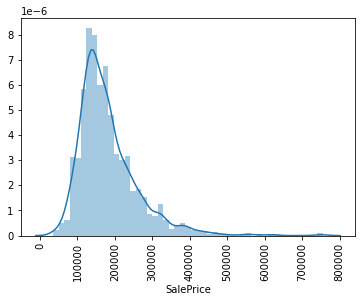

In [5]:
# Plot the distribution of SalePrice

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(train['SalePrice'])
plt.xticks(rotation=90)

In [6]:
# Get skewness

print(f'Skewness = {train.SalePrice.skew()}')

Skewness = 1.8828757597682129


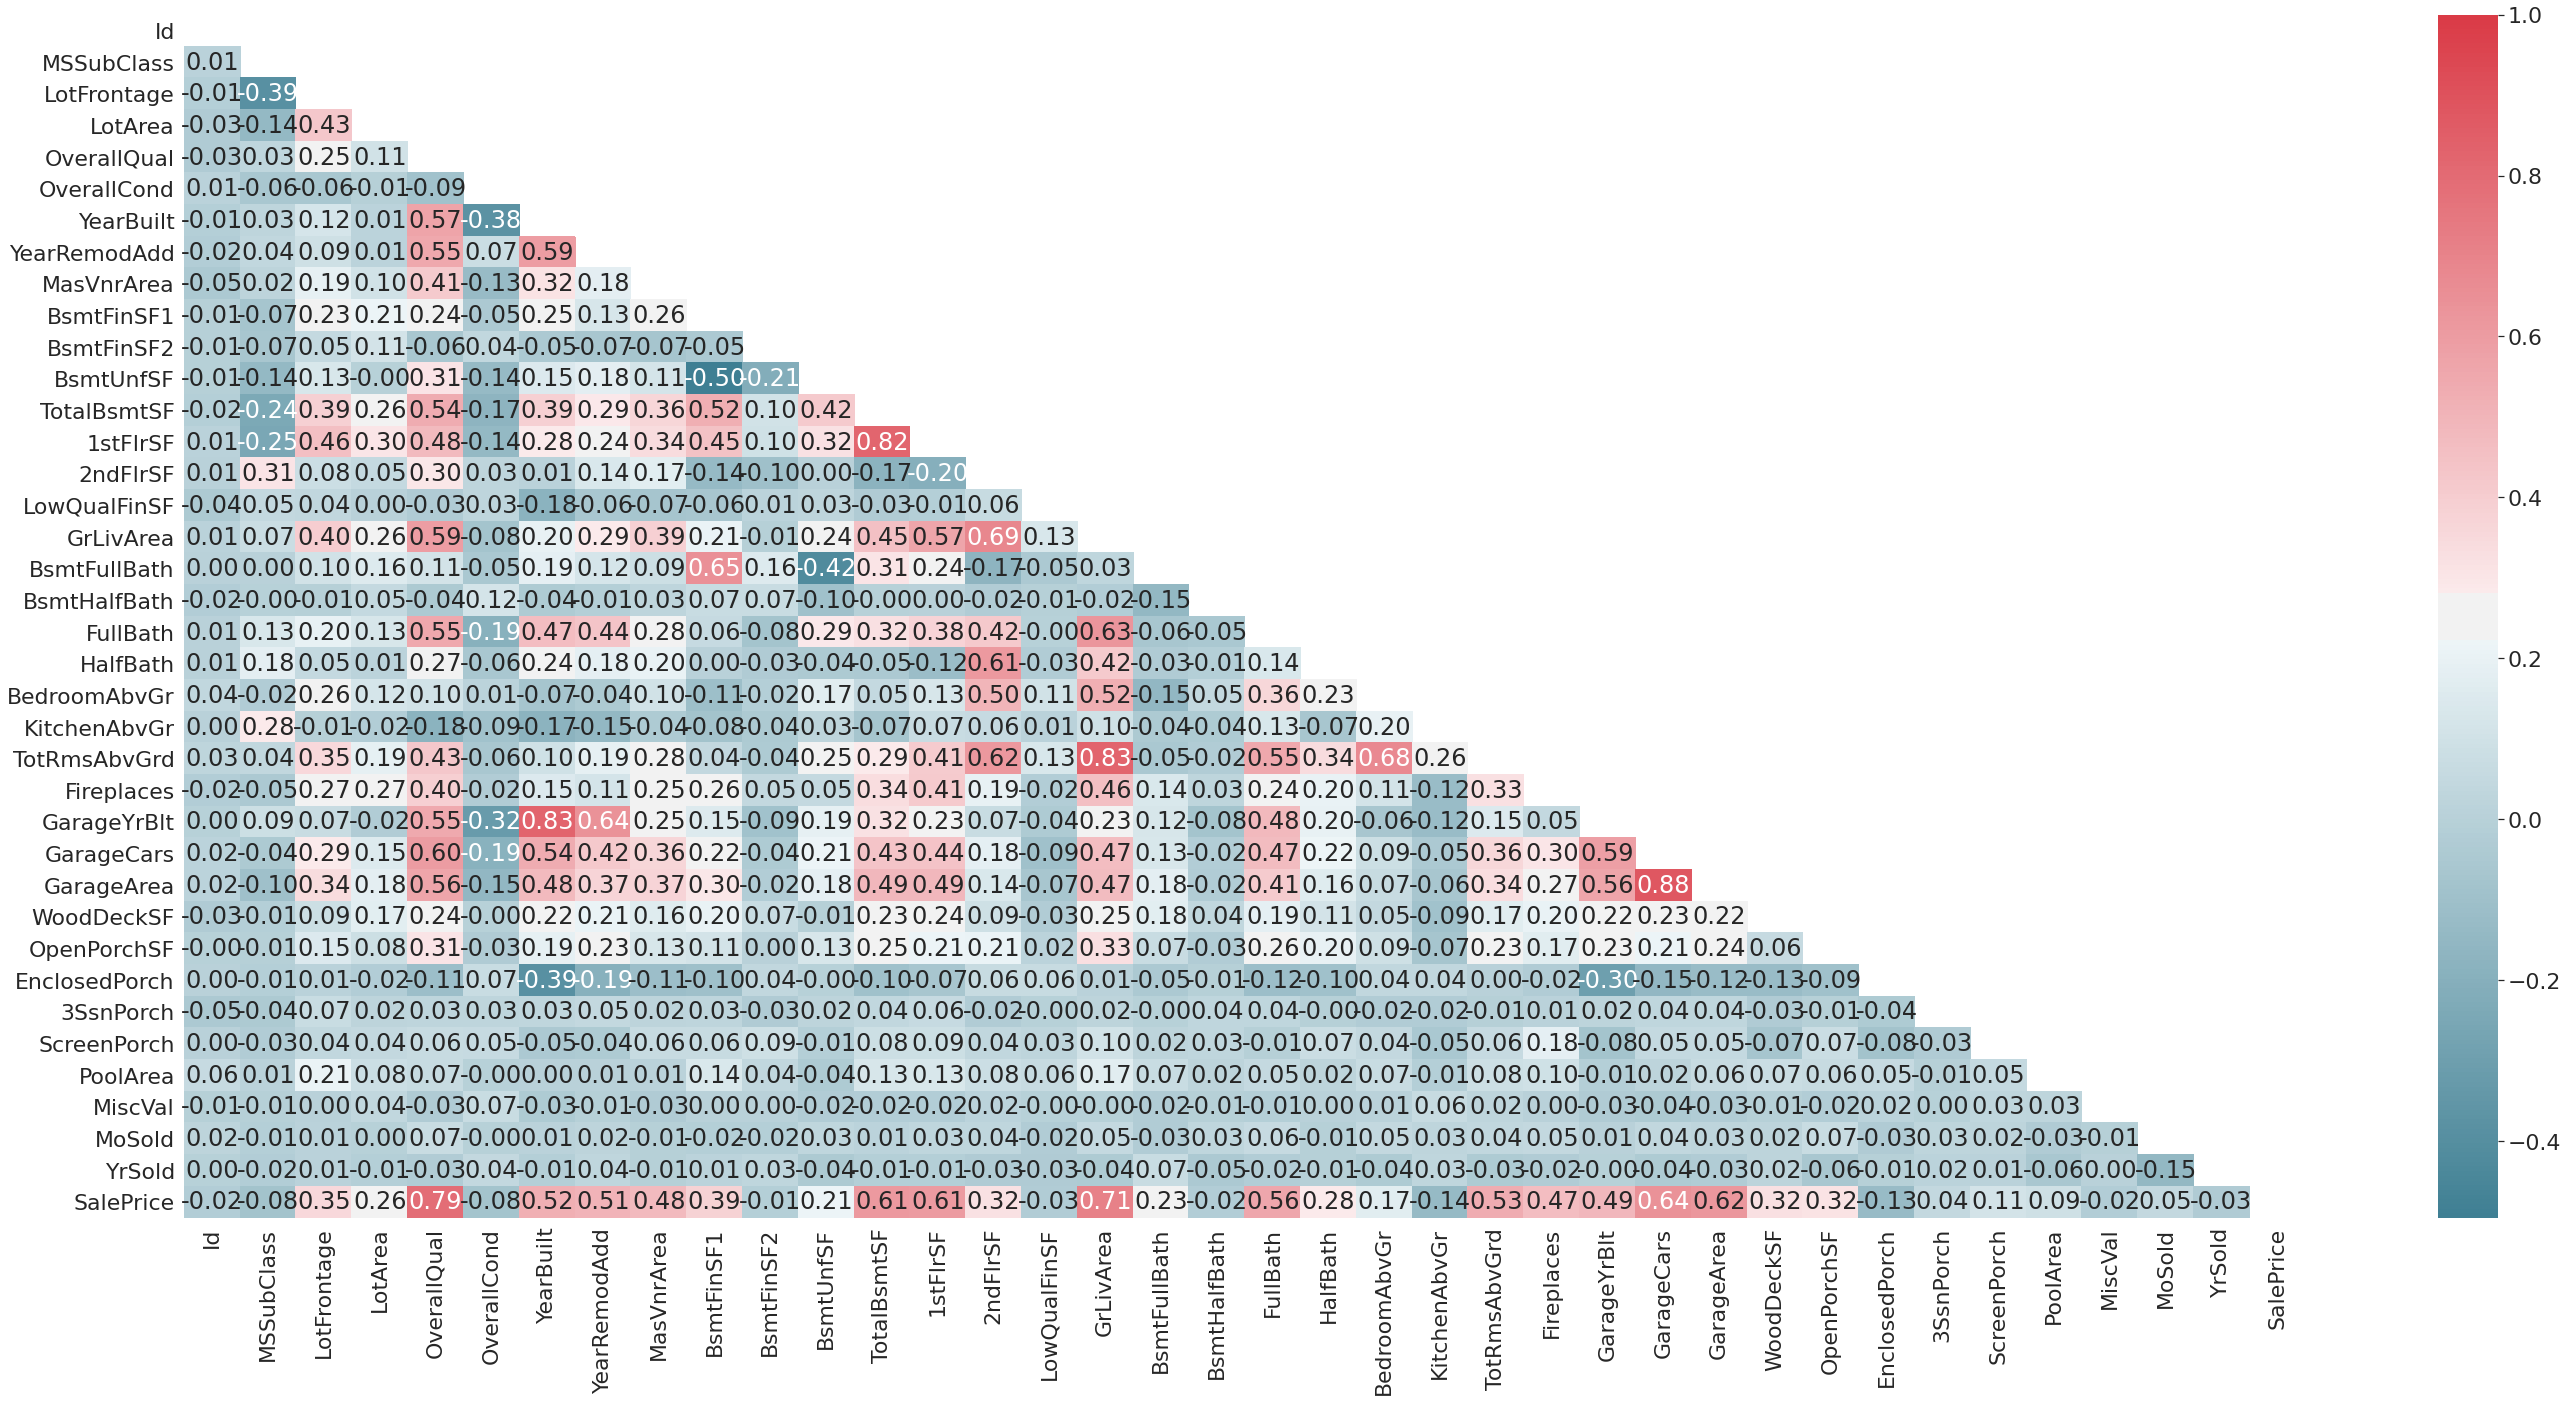

In [7]:
# Show correlations with masked heatmap

sns.set(style='whitegrid', font_scale=2)
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(40,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,  annot=True, fmt='.2f')
plt.tight_layout()

Text(0, 0.5, 'GrLivArea')

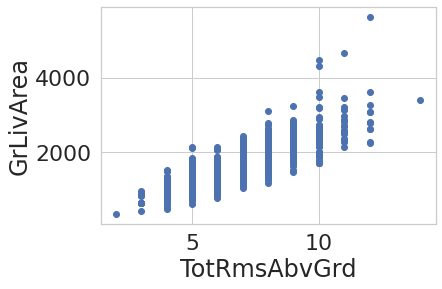

In [8]:
# Further analysis of highly correlatd features starting with TotRmsAbvGrd and GrLivArea

plt.scatter(x=train['TotRmsAbvGrd'], y=train['GrLivArea'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('GrLivArea')

Text(0, 0.5, 'YearBuilt')

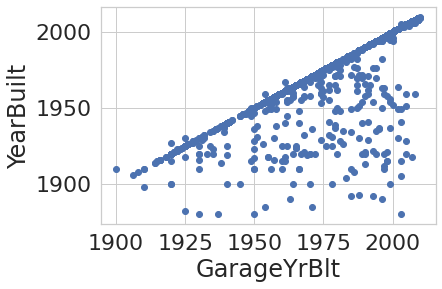

In [9]:
# GarageYrBlt and YearBuilt

plt.scatter(x=train['GarageYrBlt'], y=train['YearBuilt'])
plt.xlabel('GarageYrBlt')
plt.ylabel('YearBuilt')

Text(0, 0.5, 'TotalBsmtSF')

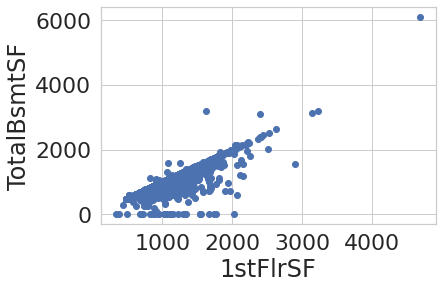

In [10]:
# 1stFlrSF and TotalBsmtSF

plt.scatter(x=train['1stFlrSF'], y=train['TotalBsmtSF'])
plt.xlabel('1stFlrSF')
plt.ylabel('TotalBsmtSF')

Text(0, 0.5, 'GarageArea')

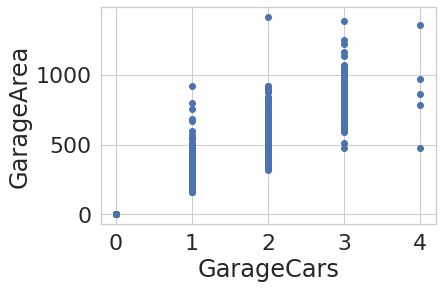

In [11]:
# GarageCars and SalePrice

plt.scatter(x=train['GarageCars'], y=train['GarageArea'])
plt.xlabel('GarageCars')
plt.ylabel('GarageArea')

In [12]:
# Correlation
corr = train.corr()

# Sort in descending order
corr_top = corr['SalePrice'].sort_values(ascending=False)[:10]

# Save top features
top_features = corr_top.index[1:]

corr_top

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

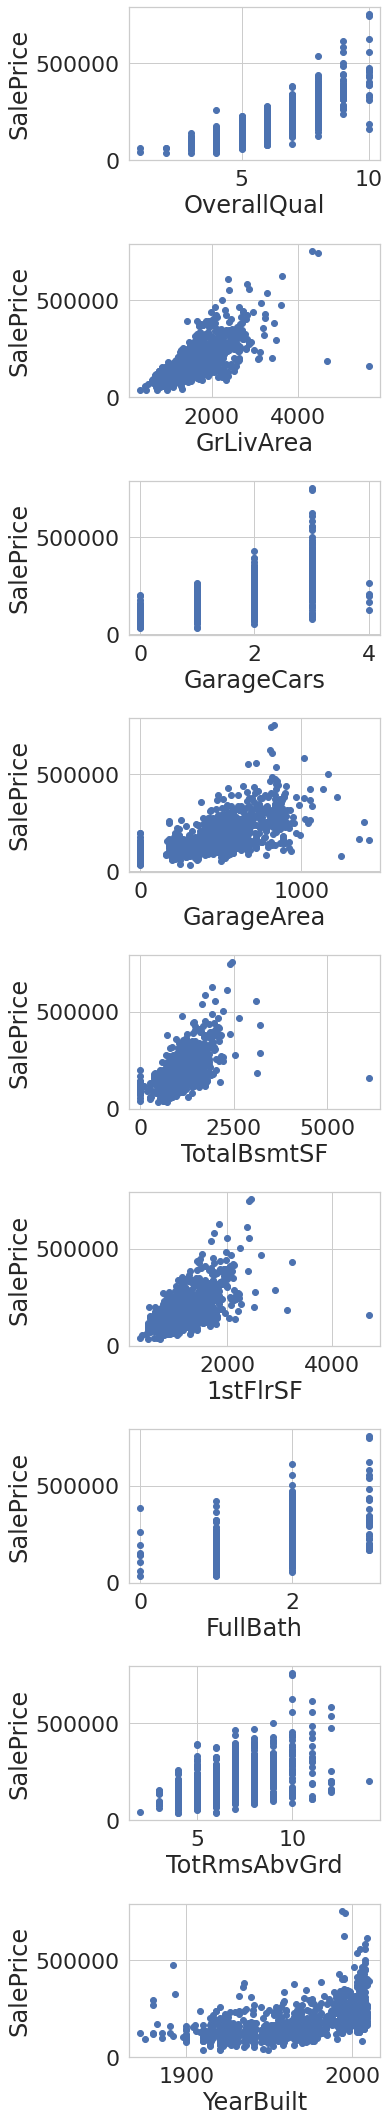

In [13]:
# Top features and SalePrice

numeric_cols = ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt']
nominal_cols = ['OverallQual','GarageCars','FullBath','TotRmsAbvGrd']

fig,ax=plt.subplots(nrows=9,ncols=1,figsize=(6,30))
for i in range(len(top_features)):    

    ax[i].scatter(x=train[top_features[i]], y=train['SalePrice'])
    ax[i].set_xlabel('%s'%(top_features[i]))
    ax[i].set_ylabel('SalePrice')

plt.tight_layout()

In [14]:
# Dealing with outliers

Q1 = []
Q3 = []
Lower_bound = []
Upper_bound = []
Outliers = []


for i in top_features:
    
    # 25th and 75th percentiles
    q1, q3 = np.percentile(train[i],25), np.percentile(train[i],75)
    # Interquartile range
    iqr = q3 - q1
    # Outlier cutoff
    cut_off = 1.5*iqr
    # Lower and Upper bounds
    lower_bound = q1-cut_off
    upper_bound = q3+cut_off
        
    # save outlier indexes
    outlier = [x for x in train.index if train.loc[x,i]<lower_bound or train.loc[x,i]>upper_bound]
    
    # append values for DataFrame
    Q1.append(q1)
    Q3.append(q3)
    Lower_bound.append(lower_bound)
    Upper_bound.append(upper_bound)
    Outliers.append(len(outlier))
    
    try:
        train.drop(outlier,inplace=True,axis=0)
    except:
        continue

df_out = pd.DataFrame({'Column':top_features,'Q1':Q1,'Q3':Q3,'Lower bound':Lower_bound,'Upper_bound':Upper_bound,'No. of outliers':Outliers})    
df_out.sort_values(by='No. of outliers',ascending=False)

,Column,Q1,Q3,Lower bound,Upper_bound,No. of outliers
4,TotalBsmtSF,792.75,1266.25,82.500,1976.500,58
1,GrLivArea,1131.00,1778.25,160.125,2749.125,31
3,GarageArea,325.25,576.00,-50.875,952.125,14
7,TotRmsAbvGrd,5.00,7.00,2.000,10.000,11
5,1stFlrSF,866.00,1343.50,149.750,2059.750,7
2,GarageCars,1.00,2.00,-0.500,3.500,5
8,YearBuilt,1954.00,2000.00,1885.000,2069.000,5
0,OverallQual,5.00,7.00,2.000,10.000,2
6,FullBath,1.00,2.00,-0.500,3.500,0


In [15]:
train.shape

(1327, 81)

In [16]:
# Save number of rows in train
train_rows = train.shape[0]

# Transform SalePrice
target = np.log(train['SalePrice'])

# Drop id and SalePrice from train
train.drop(['Id', 'SalePrice'], inplace=True, axis=1)

# Save test Ids
test_ids = test['Id']

# Drop test Id
test.drop(['Id'], inplace=True, axis=1)

# Concatenate train and test data
train = pd.concat([train, test])

Skewness = -0.12943405605773148


(array([10., 11., 12., 13., 14.]), <a list of 5 Text major ticklabel objects>)

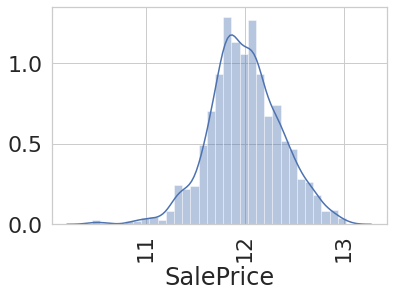

In [17]:
# Look at transformed data

print(f'Skewness = {target.skew()}')

sns.distplot(target)
plt.xticks(rotation=90)

In [18]:
# Handle null values

train.isna().sum().sort_values(ascending=False).head(20)

PoolQC          2780
MiscFeature     2688
Alley           2595
Fence           2234
FireplaceQu     1375
LotFrontage      464
GarageCond       147
GarageQual       147
GarageYrBlt      147
GarageFinish     147
GarageType       145
BsmtCond          45
BsmtExposure      45
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        22
MasVnrArea        21
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [19]:
# Examine unique values for nan features

for i in ['PoolQC', 'Fence', 'FireplaceQu', 
          'MiscFeature', 'Alley', 'BsmtCond', 
          'BsmtQual', 'BsmtExposure']:
    print(f'{i}: {train[i].unique()}')

PoolQC: [nan 'Fa' 'Gd' 'Ex']
Fence: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
FireplaceQu: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
MiscFeature: [nan 'Shed' 'Gar2' 'Othr']
Alley: [nan 'Grvl' 'Pave']
BsmtCond: ['TA' 'Gd' 'Fa' 'Po' nan]
BsmtQual: ['Gd' 'TA' 'Ex' 'Fa' nan]
BsmtExposure: ['No' 'Gd' 'Mn' 'Av' nan]


In [20]:
# Handle missing values and engineer ordinal features

# Replace nan (no pool) with 0
train['PoolQC'].replace(['Ex', 'Gd', 'Fa', np.nan], [3, 2, 1, 0], inplace=True)

# No fence
train['Fence'].replace(['GdPrv', 'MnPrv', 'GdWo', 'MnWw', np.nan], [4, 3, 2, 1, 0], inplace=True)

train['BsmtCond'].replace(['Gd', 'TA', 'Fa', 'Po', np.nan], [4, 3, 2, 1, 0], inplace=True)

for i in ['KitchenQual', 'HeatingQC', 'ExterCond', 'ExterQual']:
    train[i].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],[4, 3, 2, 1, 0], inplace=True)

for i in ['FireplaceQu', 'BsmtQual']:
    train[i].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], [5, 4, 3, 2, 1, 0], inplace=True)

for i in ['BsmtFinType1','BsmtFinType2']:
    train[i].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', np.nan], [6, 5, 4, 3, 2, 1, 0], inplace=True)

In [21]:
# Handle missing values and engineer nominal features

train['MasVnrType'].fillna('None', inplace=True)

# If no masonry work then area is 0
train['MasVnrArea'].fillna(0, inplace=True)

train['CentralAir'].replace(['N', 'Y'], [0, 1], inplace=True)

# Assume typical unless deductions are warranted
train['Functional'].fillna('Typical', inplace=True)

#Replace with Other
for i in ['SaleType', 'Exterior1st', 'Exterior2nd']:
    train[i].fillna('Other', inplace=True)

# Replace with the most common value
for i in ['MSZoning', 'Utilities', 'KitchenQual', 'Electrical']:
    train[i].fillna(train[i].mode()[0], inplace=True)

In [22]:
# Handle numerical features

# Replace lot frontage with median of neighborhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

for i in ['BsmtHalfBath','BsmtFullBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']:
    train[i].fillna(0, inplace=True)

In [23]:
# Create new features

# Total surface area of house
train['TotalSF'] = train.apply(lambda x: x['1stFlrSF'] + x['2ndFlrSF'] + x['TotalBsmtSF'], axis=1)

# Total number of bathrooms in the house
train['TotalBath'] = train.apply(lambda x: x['FullBath'] + 0.5*x['HalfBath'] + x['BsmtFullBath'] + 0.5*x['BsmtHalfBath'], axis=1)

# Total Porch area in the house
train['TotalPorch'] = train.apply(lambda x: x['OpenPorchSF'] + x['EnclosedPorch'] + x['3SsnPorch'] + x['ScreenPorch'], axis=1)

# New house or an old house
train['NewHouse'] = train.apply(lambda x: 1 if x['SaleCondition']=='Partial' else 0, axis=1)

In [25]:
# One hot encoding

train = pd.get_dummies(train, drop_first=True)
print(train.shape)
print(train.head())

(5, 73)
      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
106           30         60.0    10800            4            7       1885   
439           50         67.0    12354            6            8       1920   
1076          50         60.0    10800            5            8       1936   
370           70         68.0     9928            7            8       1915   
1330          20         65.0     9750            5            5       1958   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  Foundation_CBlock  \
106           1995         0.0          2          2  ...                  0   
439           2000         0.0          2          2  ...                  0   
1076          1989         0.0          2          2  ...                  1   
370           1994         0.0          2          3  ...                  0   
1330          1958         0.0          2          2  ...                  1   

      BsmtExposure_No  Functional_Mi

In [26]:
# Reclaim train features and test dataset

features = train.iloc[:train_rows,:]
test = train.iloc[train_rows:,:]

In [27]:
# Split train into train and validation

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [5, 1327]

In [ ]:
# Build the model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_val)

rmse = np.sqrt(mean_square_error(y_val, predictions))
print(rmse)